# IDEFICS_ROCOv2

This notebook fine-tunes [Idefics3-8B-Llama3](https://huggingface.co/HuggingFaceM4/Idefics3-8B-Llama3) model. The source model is fine-tuned on the [Radiology Objects in Context (ROCO)](https://huggingface.co/datasets/eltorio/ROCOv2-radiology) dataset, a large-scale medical and multimodal imaging collection.  

The fine-tuning process stores the model checkpoints on a regular basis. Re run the notebook from the last checkpoint to continue the fine-tuning process.

## Fine-tuning parameters

In [9]:
dataset_id = "eltorio/ROCOv2-radiology"
prompt= "You are an expert radiologist certified with over 15 years of experience in diagnostic imaging, describe this image"
source_model_id = "HuggingFaceM4/Idefics3-8B-Llama3"
hugging_face_user = "eltorio"
destination_model = "IDEFICS3_ROCOv2"
destination_model_id = f"{hugging_face_user}/{destination_model}"
output_dir = "IDEFICS3_ROCOv2"

### Log in Kaggle

In [2]:
import os
import json
if not os.path.exists('/kaggle/.kaggle/kaggle.json'):
    try:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        KAGGLE_JSON = user_secrets.get_secret("KAGGLE_JSON")
    except:
        KAGGLE_JSON = os.getenv("KAGGLE_JSON")

    kaggle_dir = os.path.expanduser("~/.kaggle")
    kaggle_file = os.path.join(kaggle_dir, "kaggle.json")

    os.makedirs(kaggle_dir, exist_ok=True)

    with open(kaggle_file, 'w') as file:
        json.dump(KAGGLE_JSON, file)

### Login WandB

In [10]:
import wandb
try:
  from kaggle_secrets import UserSecretsClient
  user_secrets = UserSecretsClient()
  WANDB_API_KEY = user_secrets.get_secret("WANDB_API_KEY")
  os.environ["WANDB_API_KEY"] = WANDB_API_KEY
except:
  if os.getenv("WANDB_API_KEY") is None:
    os.environ["WANDB_API_KEY"] = input("Enter your W&B API key: ")

if not wandb.login():
  raise Exception("Can't login to W&B")
else:
  print("Logged in to W&B")
  os.environ["WANDB_PROJECT"]=destination_model

Logged in to W&B


## Login on Hugging Face

In [11]:
from huggingface_hub import login
import os

try:
  from kaggle_secrets import UserSecretsClient
  user_secrets = UserSecretsClient()
  HF_TOKEN = user_secrets.get_secret("HF_TOKEN")
  os.environ["HF_TOKEN"] = HF_TOKEN
except:
  if not os.getenv("HF_TOKEN"):
    raise ValueError("You need to set the HF_TOKEN environment variable.")
  HF_TOKEN = os.getenv("HF_TOKEN")

print(f"Login with {HF_TOKEN[:4]}{'*'*12}{HF_TOKEN[16:]}")
login(
  token=HF_TOKEN,
  add_to_git_credential=False
)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Login with hf_C************usZNcSKWwmtCiuUAgIxFZ


### Step 1: Retrieve the dataset from Hugging Face.

In [12]:
from datasets import load_dataset

full_dataset = load_dataset(dataset_id,keep_in_memory=False)
train_dataset = full_dataset["train"]
eval_dataset = full_dataset["validation"]

README.md:   0%|          | 0.00/4.50k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

train-00000-of-00027.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

train-00001-of-00027.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

train-00002-of-00027.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00003-of-00027.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00004-of-00027.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

train-00005-of-00027.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00006-of-00027.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00007-of-00027.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

train-00008-of-00027.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

train-00009-of-00027.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00010-of-00027.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00011-of-00027.parquet:   0%|          | 0.00/508M [00:00<?, ?B/s]

train-00012-of-00027.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00013-of-00027.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

train-00014-of-00027.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

train-00015-of-00027.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00016-of-00027.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00017-of-00027.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00018-of-00027.parquet:   0%|          | 0.00/525M [00:00<?, ?B/s]

train-00019-of-00027.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00020-of-00027.parquet:   0%|          | 0.00/483M [00:00<?, ?B/s]

train-00021-of-00027.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

train-00022-of-00027.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00023-of-00027.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00024-of-00027.parquet:   0%|          | 0.00/500M [00:00<?, ?B/s]

train-00025-of-00027.parquet:   0%|          | 0.00/511M [00:00<?, ?B/s]

train-00026-of-00027.parquet:   0%|          | 0.00/517M [00:00<?, ?B/s]

validation-00000-of-00006.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

validation-00001-of-00006.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

validation-00002-of-00006.parquet:   0%|          | 0.00/428M [00:00<?, ?B/s]

validation-00003-of-00006.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

validation-00004-of-00006.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

validation-00005-of-00006.parquet:   0%|          | 0.00/422M [00:00<?, ?B/s]

test-00000-of-00006.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

test-00001-of-00006.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

test-00002-of-00006.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

test-00003-of-00006.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

test-00004-of-00006.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

test-00005-of-00006.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/59962 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9904 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9927 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/27 [00:00<?, ?it/s]

### Step 3: Test the data for detecting wrong Pillow version.

In [13]:
train_dataset[len(train_dataset)-4]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1684x2294>,
 'image_id': 'ROCOv2_2023_train_060164',
 'caption': 'Right shoulder of a 50-year-old patient showing an anterior dislocated shoulder.',
 'cui': ['C0037005']}

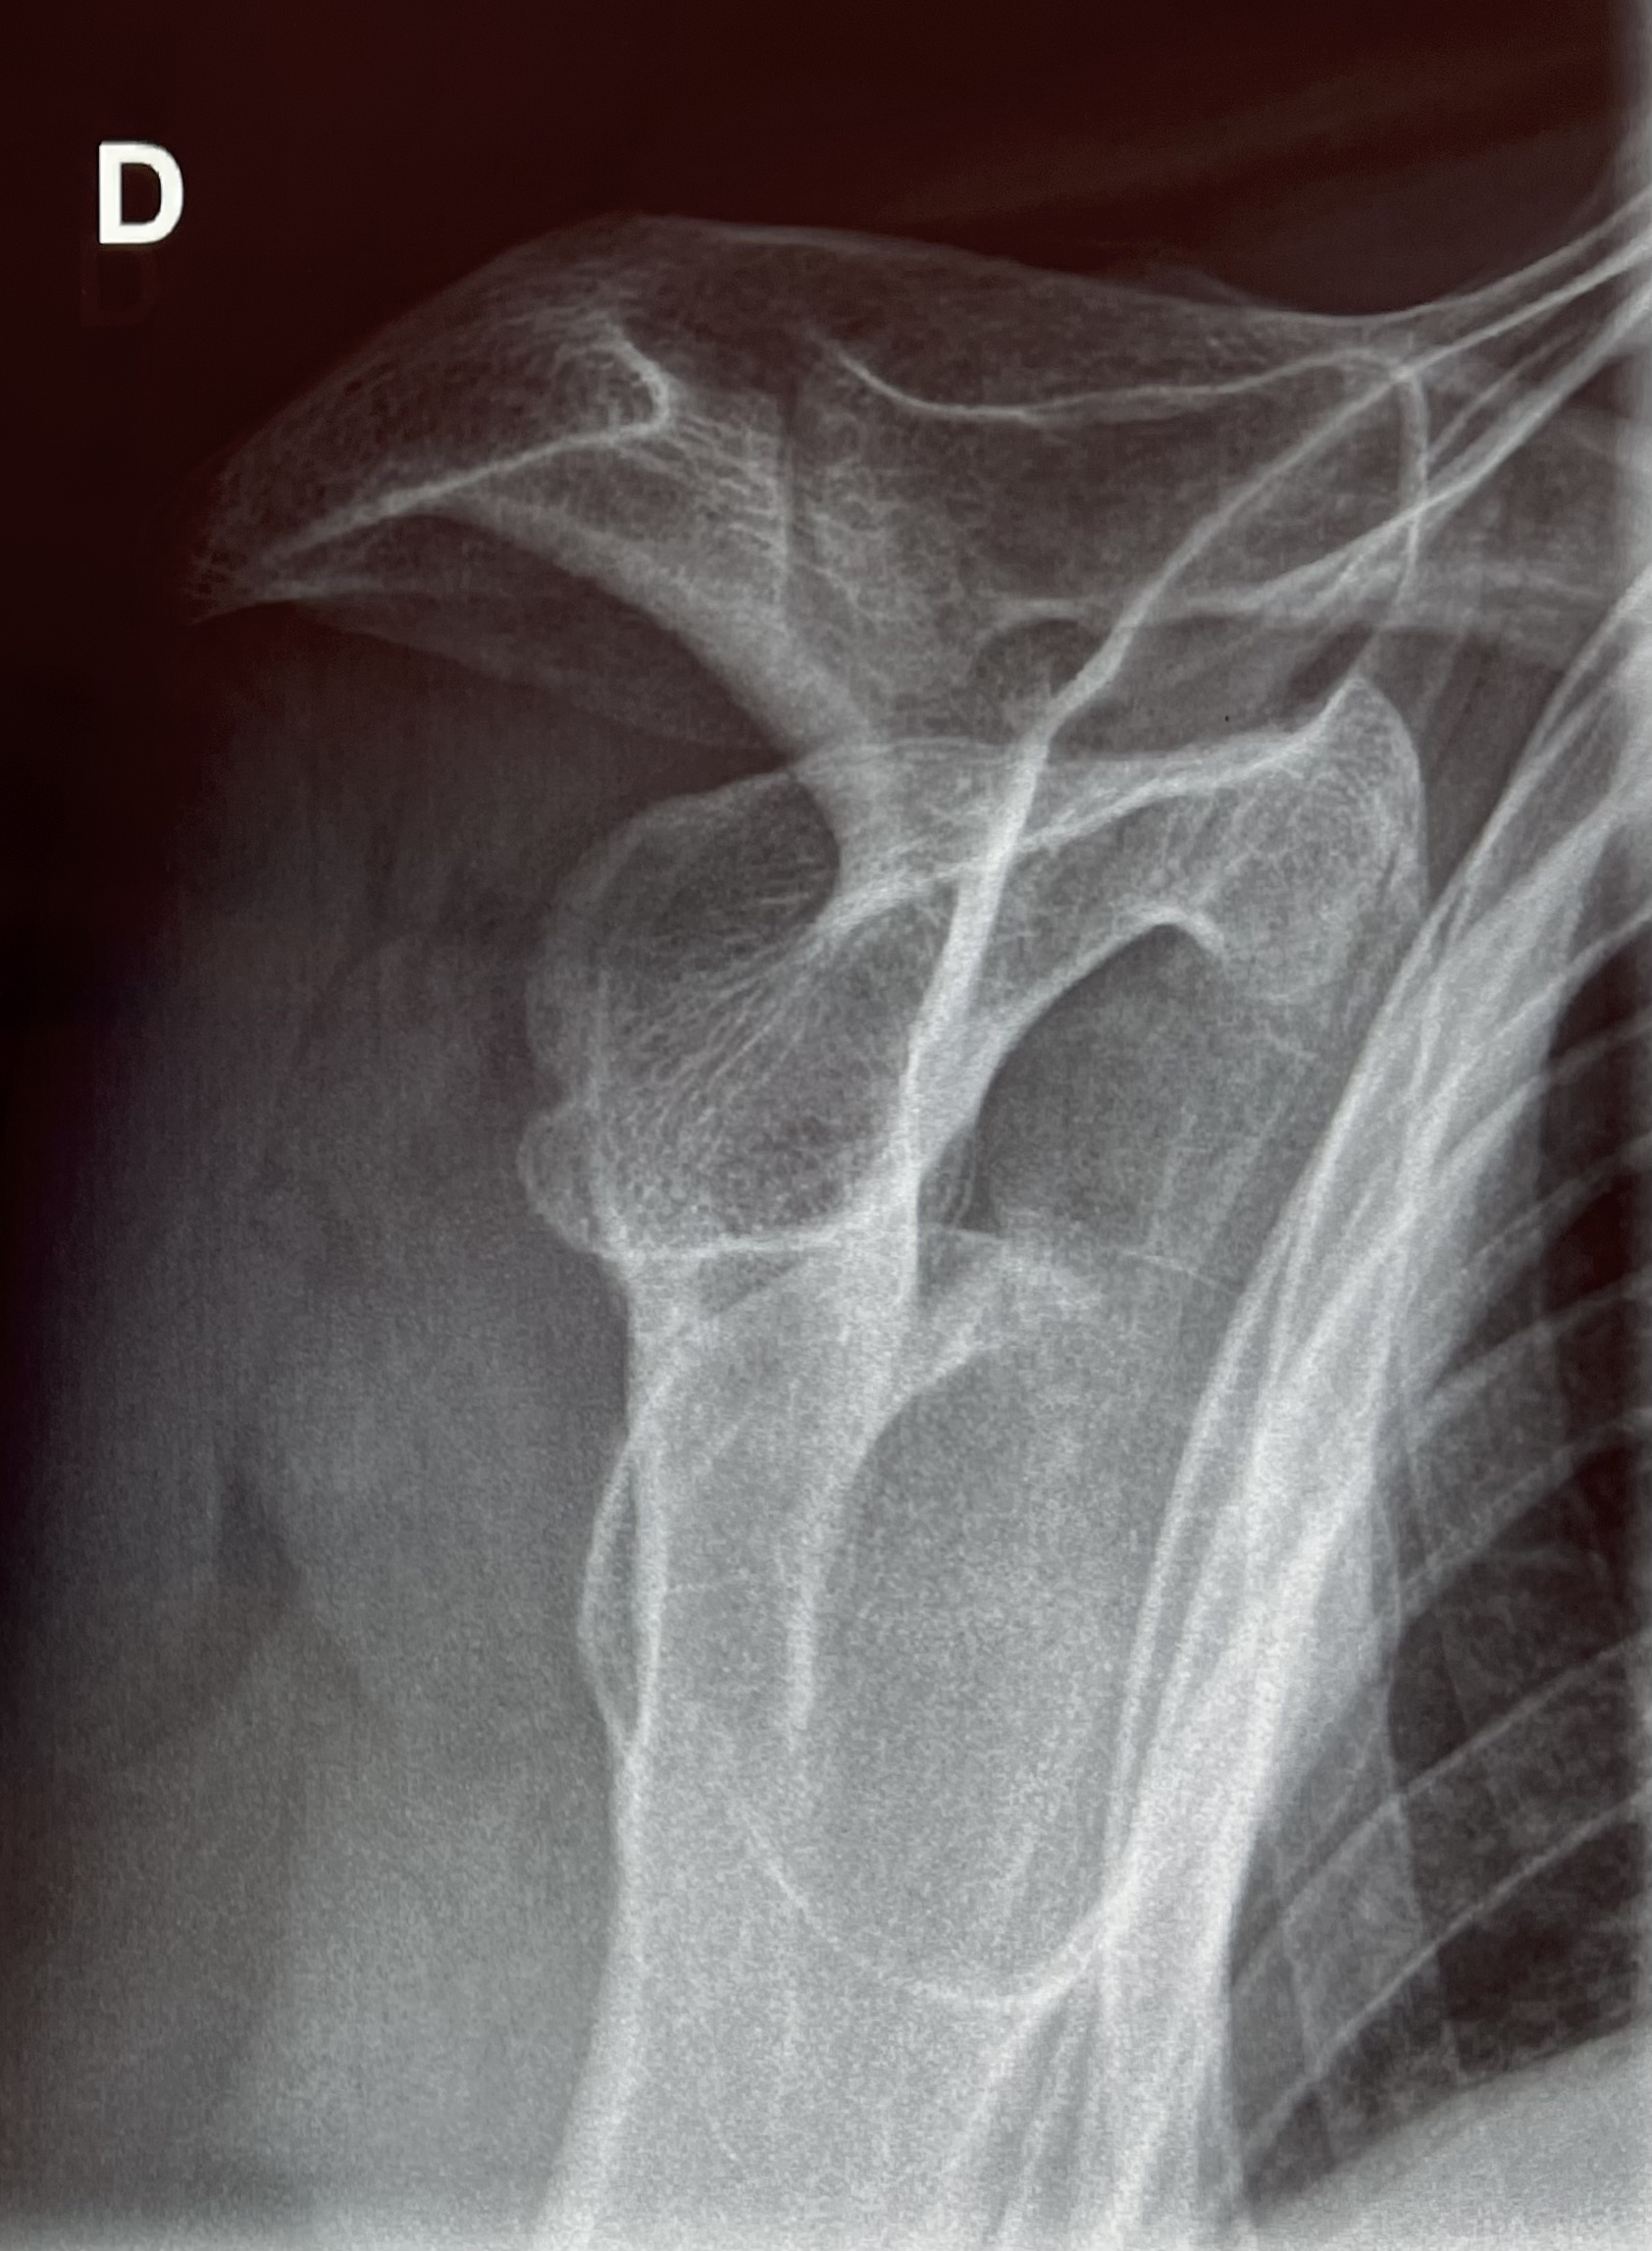

In [14]:
train_dataset[len(train_dataset)-4]['image']

### Step 4: Configure LoRA adapters

In [34]:
import torch
from peft import LoraConfig,get_peft_model
from transformers import AutoProcessor, BitsAndBytesConfig, Idefics3ForConditionalGeneration

DEVICE = "cuda"
USE_LORA = True
USE_QLORA = False

processor = AutoProcessor.from_pretrained(
    source_model_id,
    do_image_splitting=False
)

if USE_QLORA or USE_LORA:
    lora_config = LoraConfig(
        r=8,
        lora_alpha=8,
        lora_dropout=0.1,
        target_modules='.*(text_model|modality_projection|perceiver_resampler).*(down_proj|gate_proj|up_proj|k_proj|q_proj|v_proj|o_proj).*$',
        task_type="CAUSAL_LM",
        use_dora=False if USE_QLORA else True,
        init_lora_weights="gaussian"
    )
    if USE_QLORA:
        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.float16
        )
    model = Idefics3ForConditionalGeneration.from_pretrained(
        source_model_id,
        torch_dtype=torch.float16,
        quantization_config=bnb_config if USE_QLORA else None,
    )
    model = get_peft_model(model, lora_config)
    model = model.to(DEVICE)
else:
    model = Idefics3ForConditionalGeneration.from_pretrained(
        source_model_id,
        torch_dtype=torch.float16,
        _attn_implementation="flash_attention_2", # This works for A100 or H100
    ).to(DEVICE)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-12-05 18:36:11.299502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733423771.360739     225 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733423771.378961     225 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 18:36:11.524136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


preprocessor_config.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/951 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.6k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.04G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



### Step 5: Create Data Collator for IDEFICS3 format.

In [35]:
class MyDataCollator:
    def __init__(self, processor):
        self.processor = processor
        self.image_token_id = processor.tokenizer.additional_special_tokens_ids[
            processor.tokenizer.additional_special_tokens.index("<image>")
        ]

    def __call__(self, samples):
        texts = []
        images = []
        for sample in samples:
            image = sample["image"]
            answer = sample["caption"]
            messages = [
                {
                    "role": "system",
                    "content": [
                        {"type": "text", "text": prompt}
                    ]

                },
                {
                    "role": "user",
                    "content": [
                        {"type": "image"},
                    ]
                },
                {
                    "role": "assistant",
                    "content": [
                        {"type": "text", "text": answer}
                    ]
                }
            ]
            text = processor.apply_chat_template(messages, add_generation_prompt=False)
            texts.append(text.strip())
            images.append([image.convert('RGB')])

        batch = processor(text=texts, images=images, return_tensors="pt", padding=True)

        labels = batch["input_ids"].clone()
        labels[labels == processor.tokenizer.pad_token_id] = self.image_token_id
        batch["labels"] = labels

        return batch

data_collator = MyDataCollator(processor)

### Step 6: Setup training parameters

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = output_dir,
    overwrite_output_dir = False,
    auto_find_batch_size = True,
    learning_rate = 2e-4,
    fp16 = True,
    per_device_train_batch_size = 2,
    per_device_eval_batch_size = 2,
    gradient_accumulation_steps = 8,
    dataloader_pin_memory = False,
    save_total_limit = 3,
    eval_strategy = "epoch",
    save_strategy = "steps",
    eval_steps = 100,
    save_steps = 10, # checkpoint each 10 steps
    resume_from_checkpoint = True,
    logging_steps = 5,
    remove_unused_columns = False,
    push_to_hub = True,
    label_names = ["labels"],
    load_best_model_at_end = False,
    report_to = "wandb",
    optim = "paged_adamw_8bit",
    run_name = destination_model,
)

In [37]:
trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = data_collator,
    train_dataset = train_dataset,
    eval_dataset = eval_dataset,
)

### Step 7: Start (or restart) Training

In [38]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


KeyboardInterrupt: 

In [ ]:
model = Idefics3ForConditionalGeneration.from_pretrained(source_model_id , torch_dtype=torch.float16).to(DEVICE)
model.load_adapter(destination_model_id, device_map="auto")

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 20.39 GiB is allocated by PyTorch, and 155.53 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)